In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('credit.csv')
data.head()

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


In [3]:
data.tail()

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
37092,1250026389,637,62.0,Female,Married,Gold,Verve,Local,534813,198167,1,Lagos
37093,1247133695,582,20.0,Male,Divorced,Gold,Verve,Local,178903,147133,0,Enugu
37094,1260545996,571,67.0,Male,Married,White,Visa,International,301594,256814,1,Abuja
37095,1267917366,528,58.0,Female,Unknown,Gold,Verve,International,212826,113439,0,Port Harcourt
37096,1252870437,659,27.0,Male,Married,White,Visa,International,133810,271388,0,Port Harcourt


In [4]:
# dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CustomerAge                28246 non-null  float64
 3   Gender                     37097 non-null  object 
 4   Marital Status             37097 non-null  object 
 5   CardColour                 37097 non-null  object 
 6   CardType                   37097 non-null  object 
 7   Domain                     37097 non-null  object 
 8   Amount                     37097 non-null  int64  
 9   AverageIncomeExpendicture  37097 non-null  int64  
 10  Outcome                    37097 non-null  int64  
 11  Customer_City_Address      37097 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.4+ MB


In [5]:
# checking the number of missing values in each column
data.isnull().sum()


AcountNumber                    0
CVV                             0
CustomerAge                  8851
Gender                          0
Marital Status                  0
CardColour                      0
CardType                        0
Domain                          0
Amount                          0
AverageIncomeExpendicture       0
Outcome                         0
Customer_City_Address           0
dtype: int64

In [6]:
# Check the column names in the dataframe
print(data.columns)

# Replace 'class' with the correct column name
data['Outcome'].value_counts()


Index(['AcountNumber', 'CVV', 'CustomerAge', 'Gender', 'Marital Status',
       'CardColour', 'CardType', 'Domain', 'Amount',
       'AverageIncomeExpendicture', 'Outcome', 'Customer_City_Address'],
      dtype='object')


1    27370
0     9727
Name: Outcome, dtype: int64

In [7]:
data=data.drop(["AcountNumber"],axis=1)

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data[['CustomerAge']] = imputer.fit_transform(data[['CustomerAge']])



In [9]:
data.isnull().sum()

CVV                          0
CustomerAge                  0
Gender                       0
Marital Status               0
CardColour                   0
CardType                     0
Domain                       0
Amount                       0
AverageIncomeExpendicture    0
Outcome                      0
Customer_City_Address        0
dtype: int64

In [10]:
data["Outcome"].value_counts()

1    27370
0     9727
Name: Outcome, dtype: int64

In [11]:
obj_data=data.dtypes[data.dtypes == 'object'].index.tolist()

In [12]:
for i in obj_data:
    print(i,len(data[i].unique()))

Gender 2
Marital Status 4
CardColour 2
CardType 3
Domain 2
Customer_City_Address 8


In [13]:
for i in obj_data:
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])

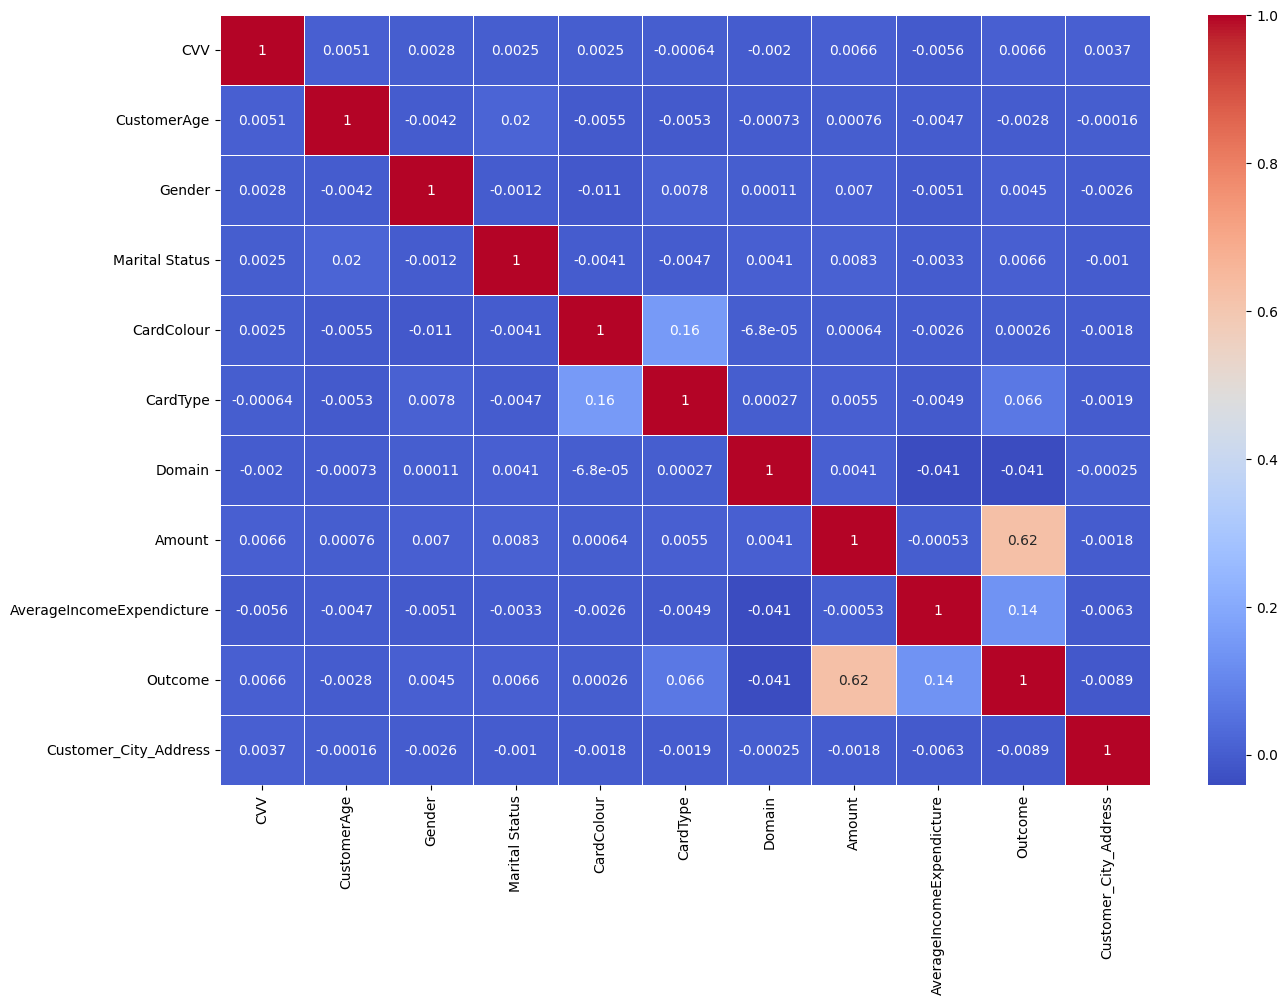

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidths=.5)
plt.show()

In [15]:
data=data.drop(["CardColour"],axis=1)

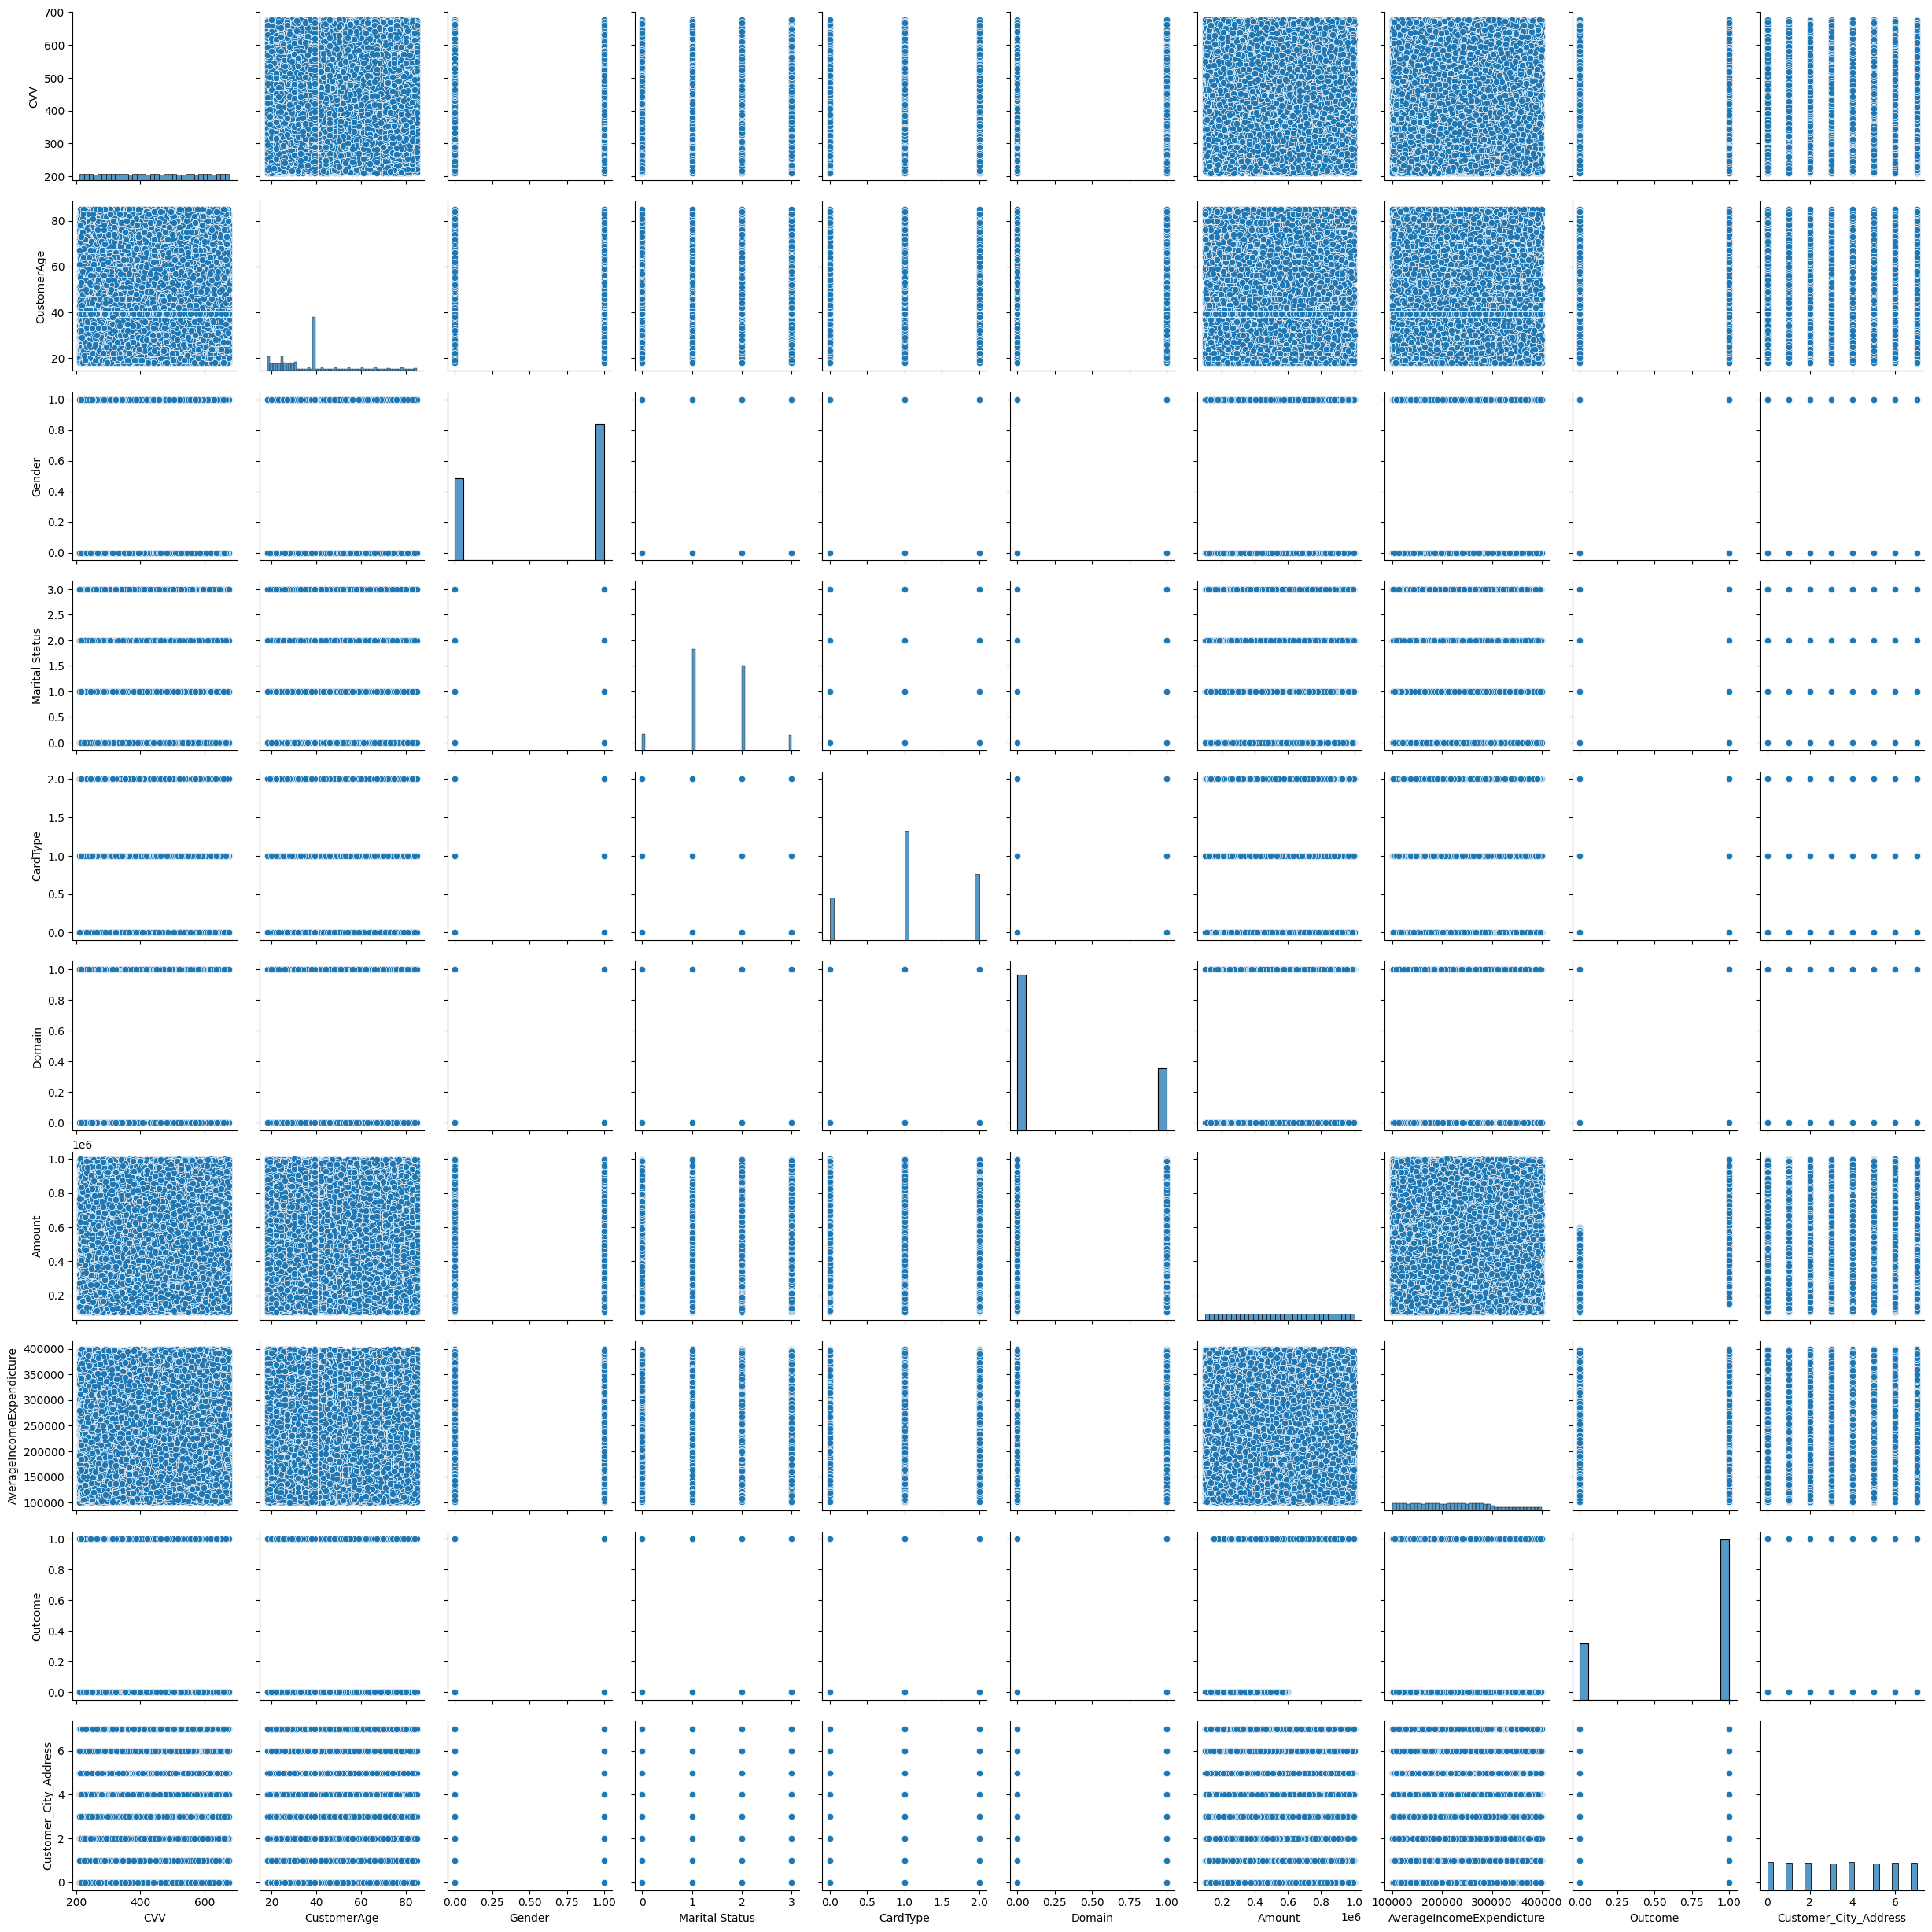

In [16]:
sns.pairplot(data)
plt.show()

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CVV,37097.0,443.595897,135.223267,211.0,327.0,443.000000,561.0,678.0
CustomerAge,37097.0,39.157509,17.507522,18.0,25.0,39.157509,45.0,85.0
Gender,37097.0,0.625010,0.484127,0.0,0.0,1.000000,1.0,1.0
Marital Status,37097.0,1.459822,0.736249,0.0,1.0,1.000000,2.0,3.0
CardType,37097.0,1.108661,0.698688,0.0,1.0,1.000000,2.0,2.0
Domain,37097.0,0.285737,0.451771,0.0,0.0,0.000000,1.0,1.0
Amount,37097.0,550260.997736,260629.814049,100003.0,324480.0,550293.000000,775075.0,999956.0
AverageIncomeExpendicture,37097.0,227386.956492,78977.053916,100017.0,161178.0,222530.000000,283447.0,399971.0
Outcome,37097.0,0.737796,0.439839,0.0,0.0,1.000000,1.0,1.0
Customer_City_Address,37097.0,3.490525,2.296053,0.0,1.0,4.000000,6.0,7.0


In [18]:
data.head()

,CVV,CustomerAge,Gender,Marital Status,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,364,28.0,1,1,1,1,129282,170919,0,1
1,401,25.0,1,2,1,0,574384,329353,1,1
2,266,21.0,0,1,2,0,190766,292922,0,1
3,402,26.0,1,3,2,1,130395,145444,0,2
4,334,28.0,0,1,1,0,685145,295990,1,7


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale=StandardScaler()
# data=scale.fit_transform(data[['Amount',"AverageIncomeExpendicture"]])
data["Amount"]=pd.DataFrame(scale.fit_transform(data[['Amount']]))
data["AverageIncomeExpendicture"]=pd.DataFrame(scale.fit_transform(data[['AverageIncomeExpendicture']]))

In [24]:
X_train.head()

NameError: name 'X_train' is not defined

In [ ]:
data.head()

,CVV,CustomerAge,Gender,Marital Status,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,364,28.0,1,1,1,1,-1.615259,-0.715002,0,1
1,401,25.0,1,2,1,0,0.092558,1.291102,1,1
2,266,21.0,0,1,2,0,-1.379350,0.829810,0,1
3,402,26.0,1,3,2,1,-1.610989,-1.037568,0,2
4,334,28.0,0,1,1,0,0.517538,0.868657,1,7


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:

# model=LogisticRegression()
model=KNeighborsClassifier(n_neighbors=5)
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred)
print(accuracy_knn)

0.7561994609164421


In [ ]:

model=RandomForestClassifier(n_estimators=100)
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8548517520215634


In [ ]:
import warnings
warnings.filterwarnings("ignore")
model=LogisticRegression()

x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8382749326145552


In [ ]:
best_accuracy = max(accuracy_log_reg, accuracy_knn, accuracy_rf)
best_classifier = ""
if best_accuracy == accuracy_log_reg:
    best_classifier = "Logistic Regression"
elif best_accuracy == accuracy_knn:
    best_classifier = "K-Nearest Neighbors"
else:
    best_classifier = "Random Forest"

print(f"The best classifier is {best_classifier} with accuracy: {best_accuracy}")
Accuracy = best_accuracy * 100
print(f"The accuracy of the best classifier is {Accuracy:.2f}%")